#### Features Selection Based on Uni-Variante ROC_AUC for Classification and MSE for Regression.

What is the ROC_AUC ?

AUC = Area Under the Curve.
AUROC = Area Under the Receiver Operating Characteristic curve.
MSE = Mean square error
ROC is a probability curve and AUC represents degree or measure of separability.
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.
An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.

The receiver operating characteristics(ROC) curve is well known in evaluating classification performance.Owing to its superiority in dealing with imbalaced and cost-sensitive data,the ROC curve has been exploited as a popular metric to evaluate the ML models.

ROC_CURVE is drawn against the sensitivity and 1-specificity area under ROC curve shows the AUC which is a metric.
Exsisting ROC based on feature selection apporoches are simple and effecive in individual feature selection.This is uni_variate feature selection technique.That means while selecting the one feature it doesnt found out its effect any on the current features.That means we find the features important only based on AUC and ROC curve charectestics or metrics on UC metric.



This is been widely used to determine the classification accuracy in supervised learning.

This kind of the ROC_AUC classification can be used for the binary although it used for many classification (i.e.more than the binary) but this will be the difficult to use.

#### Use of ROC_AUC in Classification Problem.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [5]:
data = pd.read_csv('santander-train.csv',nrows=2000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
x = data.drop(labels='TARGET',axis=1)
y= data['TARGET']

x.shape,y.shape

((2000, 370), (2000,))

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state =0)

x_train.shape,x_test.shape

((1600, 370), (400, 370))

In [ ]:
#remove the constant and quasi constant

In [10]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_fiter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

x_train_fiter.shape,x_test_filter.shape

((1600, 222), (400, 222))

In [ ]:
#we want to remove duplicate data

In [14]:
x_train_T = x_train_fiter.T
x_test_T  = x_test_filter.T

x_train_T = pd.DataFrame(x_train_T)
x_test_T  = pd.DataFrame(x_test_T)

In [17]:
duplicate_feature = x_train_T.duplicated()
keep_them = [not index for index in duplicate_feature]

x_train_unique = x_train_T[keep_them].T
x_test_unique  = x_test_T[keep_them].T

x_train_unique.shape,x_test_unique.shape

((1600, 200), (400, 200))

#### Now Calculate ROC_AUC Score

In [23]:
#we need to create first upon the empty list like auc_roc
roc_auc = []
#It will read the one by one all the features from the columns of the X_train_unique.columns
for feature in x_train_unique.columns:
    clf = RandomForestClassifier(n_estimators=100,random_state=0)
#select the feature list from the x_train_unique and make it in the form of one diamensional array
    clf.fit(x_train_unique[feature].to_frame(),y_train)
    y_pred = clf.predict(x_test_unique[feature].to_frame())
#so,now we are appending value of roc_auc in the empty list
    roc_auc.append(roc_auc_score(y_test,y_pred)) 

In [24]:
print(roc_auc)

[0.4781491002570694, 0.5, 0.4987146529562982, 0.5, 0.5428838513671418, 0.5428838513671418, 0.4987146529562982, 0.5, 0.5, 0.5, 0.5, 0.5883383968216873, 0.5441691984108435, 0.4987146529562982, 0.5, 0.4987146529562982, 0.4987146529562982, 0.5, 0.4974293059125964, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4987146529562982, 0.4987146529562982, 0.5, 0.5, 0.5, 0.5441691984108435, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4961439588688946, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4974293059125964, 0.5, 0.5, 0.5, 0.4974293059125964, 0.4974293059125964, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4974293059125964, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

In [31]:
#to put this array of roc_auc in the pandas Dataframe Series 
roc_values = pd.Series(roc_auc)
roc_values.index = x_train_unique.columns
roc_values.sort_values(ascending= False,inplace = True)

If we check then we find the series which is in sorted manner and also we will get the few values which are more than the 0.5
and these values are the most important than the other becasue if we use the value which having magnitude equal to or lesser than the 0.5 that time 
It will give us random prediction and not accurate so to get the better result/prediction we have to choose more than the o.5 so that the predict should go wrong or random.
We are making here binary roc_auc technique so that those who are giving the 0.5 probablity will not be counted because they will not previde the imformation which is required to accurate prediction.

In [32]:
roc_values

11     0.588338
192    0.544169
84     0.544169
191    0.544169
12     0.544169
         ...   
117    0.497429
103    0.496144
193    0.494859
190    0.491003
0      0.478149
Length: 200, dtype: float64

Those are the values are equal to the 0.5 and less than 0.5 are not required to classifiction.So for the we need to remove that kind of values.

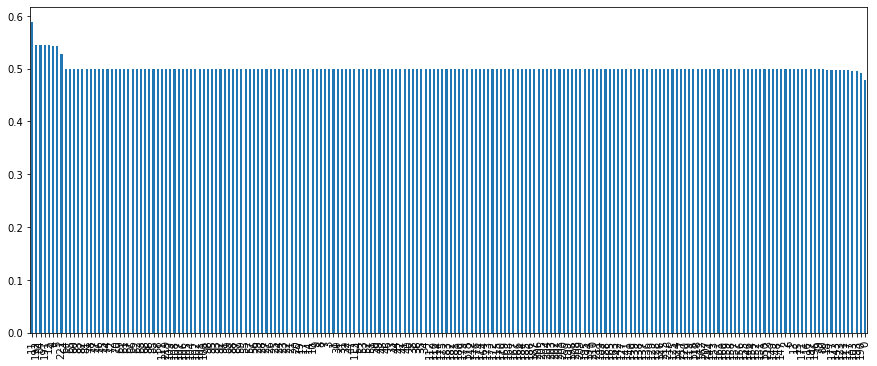

In [34]:
roc_values.plot.bar(figsize = (15,6))

In [35]:
sel= roc_values[roc_values>0.5]
sel

11     0.588338
192    0.544169
84     0.544169
191    0.544169
12     0.544169
4      0.542884
5      0.542884
221    0.528745
dtype: float64

In [36]:
len(sel)

8

In [38]:
x_train_roc = x_train_unique[sel.index]
x_test_roc  = x_test_unique[sel.index]

### Build the Model and compare the performance

In [40]:
def run_randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators=1000)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy : ',accuracy_score(y_test,y_pred))

In [41]:
%%time
run_randomforest(x_train_roc,x_test_roc,y_train,y_test)

Accuracy :  0.955
Wall time: 5.99 s


In [42]:
x_train_roc.shape

(1600, 8)

If we compare with the previous x_train,y_train then see.
From that we can only say that there is no kind of impact on the accuracy but the time required to compute the things which is taken more than the x_train_roc,x_test_roc.


In [43]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy :  0.9675
Wall time: 7.1 s


In the filtering method or any feature selection does not give us garantee of accuracy but it can give us time to compute the tthings which we want to calculate like 
accuracy.

Diffrenet algorithm can give us diffrent output.If we here that first randomfoorest with the data x_train,x_test with the roc and then 
x_train,x_test with the no any substitution.The first one does not gievn the accuracy as much given by the roc data but it given the less computational time voice versa.
According our requirement we choose the either first one or last one that having better accuracy but less high computational time.

### Feature Selection using RMSE in Regression.

RMSE = Root mean square error

In [49]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

boston = datasets.load_boston()

In [50]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [54]:
x = pd.DataFrame(data=boston.data,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
y = boston.target

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.8,random_state =0)

x_train.shape,x_test.shape

((404, 13), (102, 13))

In [60]:
#its method we have follow for univariant feature selection.
mse =[]
for feature in x_train.columns:
    clf = LinearRegression()
    clf.fit(x_train[feature].to_frame(),y_train)
    y_pred = clf.predict(x_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,y_pred))   

In [61]:
print(mse)

[76.3867415764607, 84.66034377707906, 77.02905244667242, 79.36120219345942, 76.95375968209433, 46.907351627395315, 80.3915476111525, 82.61874125667717, 82.46499985731934, 78.30831374720842, 81.79497121208001, 77.75285601192718, 46.336305360025925]


In [66]:
mse = pd.Series(mse)
mse.index = x_train.columns
mse.sort_values(ascending = False,inplace = True)
mse

CRIM       84.660344
ZN         82.618741
INDUS      82.465000
CHAS       81.794971
NOX        80.391548
RM         79.361202
AGE        78.308314
DIS        77.752856
RAD        77.029052
TAX        76.953760
PTRATIO    76.386742
B          46.907352
LSTAT      46.336305
dtype: float64

In [67]:
len(mse)

13

Higher the mse means more the error and lower the mse means the low error if we can that the some features having the low mse those features are very important than the others.so we taking the two features to get the accuracy of linear regression.

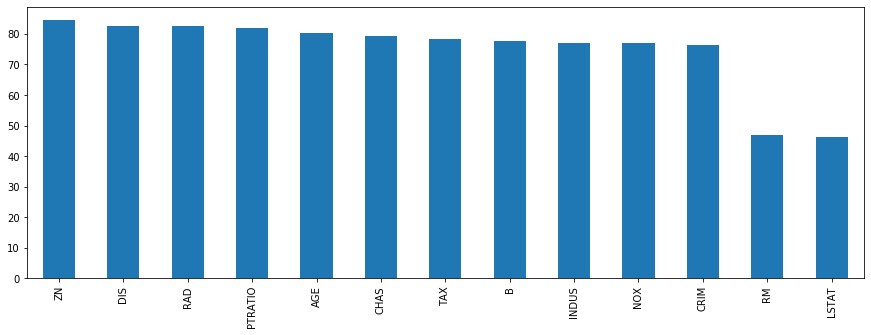

In [65]:
mse.plot.bar(figsize = (15,5))

In [73]:
x_train_2 = x_train[['RM','LSTAT']]
x_test_2  = x_test[['RM','LSTAT']]


In [85]:
%%time
model = LinearRegression()
model.fit(x_train_2,y_train)
y_pred = model.predict(x_test_2)
print('r2 score :',r2_score(y_test,y_pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('sd of house price :',np.std(y))

r2 score : 0.5409084827186418
rmse : 6.114172522817781
sd of house price : 9.188011545278203
Wall time: 10 ms


From the above we can understand that the root_mean_square_error is lesser than the standard deviation by selecting the two features.
So,we can say that the present model is not bad model.

In [ ]:
If we do the prediction by using the original dataset then lets see what happen.

In [86]:
%%time
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('r2 score :',r2_score(y_test,y_pred))
print('rmse :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('sd of house price :',np.std(y))

r2 score : 0.5892223849182503
rmse : 5.783509315085138
sd of house price : 9.188011545278203
Wall time: 11 ms


Morever we can say that the feature selection by using the model it will give us of gurantee that we will get the accuracy or less error but will reduce our computational time.
From the above we had tried first with the feature those who having the lower mean squared error it was the bad model afterwards
we had taken the prediction on the original data in that we get the r2 score maximum than the previous but rmsq we lower than the previous one but computational time was quite high.

So,we just say that we doesnt have gurantee to get the accuracy but it can be our suitability what we will prefered either time or accuracy.


Sometimes,It depends on the model which we are using and data type and requirement.